In [1]:
from IPython.core.display import HTML
HTML("<style>.container{width:100%}</style>") 

# Housing Inflation:

## Analyzing the relationship of Supply and Demand Side variables in the housing market, and Home Prices in the US over time


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [16, 5]  # set default figure size 
import calendar 
import statsmodels.formula.api as smf
import keyword
from sklearn import linear_model 
import patsy
from sklearn import metrics
from sklearn.model_selection import train_test_split
import plotly.express as px 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import datetime
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

### General outline of steps 

#### Perform descriptive, and inferrential statistical analysis, filter the data as appropriate to find interesting information
#### peroform data visualization methods and analysis 
#### perform multiple linear regression in statsmods
#### perform multiple linear regression in SKlearn using test-train-split method 
#### do model cross validation 
#### perform time-series analysis 
#### perform time series forcasting 
#### IF AND ONLY IF time permits, do machine learning pipeline 

In [3]:
demand = pd.read_csv('demand_data.csv')

demand.head(3)

d = demand.reset_index()

# demand.shape

demand.head(3)

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79


In [4]:
supply = pd.read_csv('supply_data.csv')

supply.head(3)


# supply.shape

,Unnamed: 0,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,1,01-01-2000,1727,353065,873,1636
1,2,01-02-2000,1692,351933,856,1737
2,3,01-03-2000,1651,353452,900,1604


In [5]:
supply1 = supply[supply['Unnamed: 0'].isin([1, 4, 7 ,10, 13, 16, 19, 22,25, 28, 31, 34 ,37,
                                            40 ,43 ,46, 49 ,52,55, 58, 61 ,64 ,67, 70 ,73 ,76 ,79, 82, 85, 
                                            88, 91, 94, 97, 100, 103, 106, 109, 112, 115, 118, 121, 124, 127, 
                                            130, 133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163, 166, 169, 172, 175, 178,
                                            181 ,184, 187, 190, 193, 196, 199, 202, 205, 208 ,211, 214, 217, 220, 223, 226, 229, 
                                            232, 235, 238, 241, 244, 247, 250 ])]


In [6]:
# Re-index
sap = supply1.reset_index()
s = sap.reset_index()
# rename some columns 
s.rename(columns={'index':'og','level_0':'index'}, inplace=True)
s.head(20)
s.drop(columns=['og'],inplace=True)
s.head(2)


,index,Unnamed: 0,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,0,1,01-01-2000,1727,353065,873,1636
1,1,4,01-04-2000,1597,356188,841,1626


In [7]:
# Merge datasets drop unwanted columns 

sd = pd.merge(d,s)
sd.head(5)
sd.shape
sd.dtypes
sd.head(3)
sd.drop(columns=['UNEM_RATE','FORECLOSURES','Housing_Starts','Unnamed: 0','Period','index','Permit_Number' ],inplace=True)

In [8]:
# Further adjustments before performing statistical analysis( removing the period of the great recession from our analysis when doing the Linear Regression) 

sdref = sd.drop([31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,50,51,52,53,54,55,56,57,58,59,60,61,62,63])
sdref.head(3)


,DATE,MORTGAGE,GDPC1,HPI,construction,Homes_Sold
0,2000-01-01,8.26,12935.252,101.34,353065,873
1,2000-04-01,8.32,13170.749,103.67,356188,841
2,2000-07-01,8.02,13183.890,105.79,337374,887


# Step 1: Perform basic descriptive statistics, correlation heatmap, and plot of HPI 

In [9]:
# Descriptive summary of the data 

sdref.describe()

,MORTGAGE,GDPC1,HPI,construction,Homes_Sold
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,5.452353,15830.417627,166.450980,501561.568627,881.333333
std,1.465252,2190.521298,37.603561,92577.384623,237.677569
min,2.760000,12935.252000,101.340000,337374.000000,509.000000
25%,3.995000,13680.270500,130.540000,419149.000000,638.000000
50%,5.770000,15281.525000,179.470000,528328.000000,887.000000
75%,6.455000,18061.514000,194.315000,561891.500000,1009.000000
max,8.320000,19202.310000,232.550000,675679.000000,1389.000000


In [10]:
sdref.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

,MORTGAGE,GDPC1,HPI,construction,Homes_Sold
0.01,2.855,13053.0005,102.505,340734.5,530.5
0.25,3.995,13680.2705,130.540,419149.0,638.0
0.50,5.770,15281.5250,179.470,528328.0,887.0
0.75,6.455,18061.5140,194.315,561891.5,1009.0
0.99,8.290,19157.4815,227.695,667134.5,1362.5


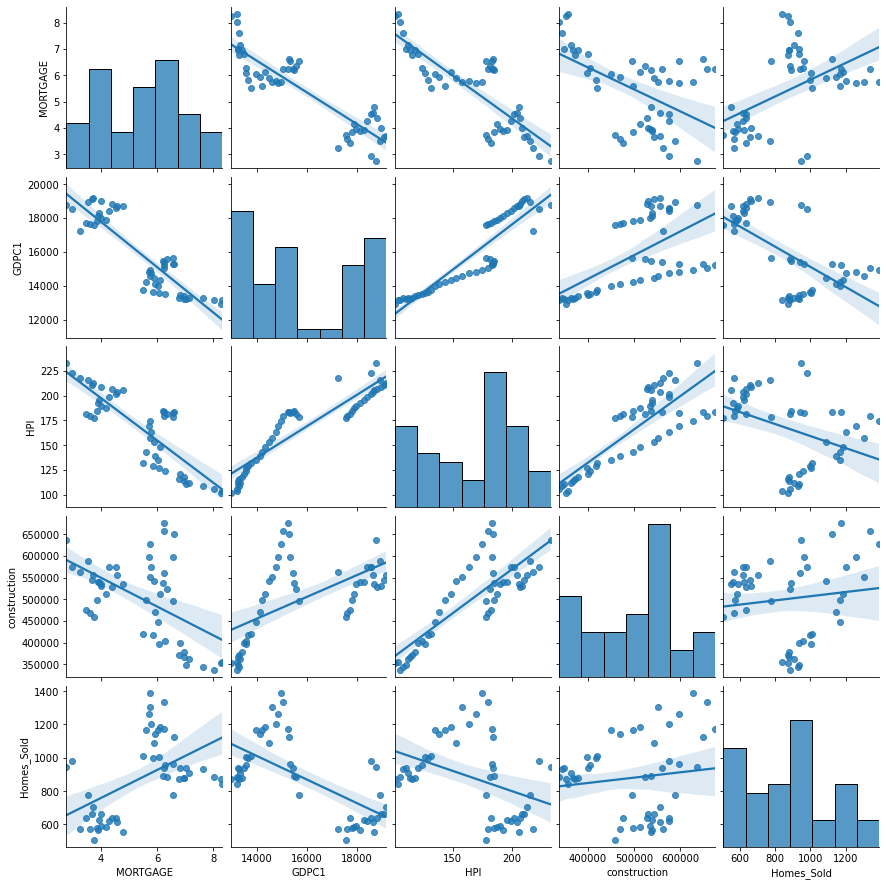

In [11]:
# Pairplot 
sns.pairplot(data=sdref, kind='reg')

<AxesSubplot:>

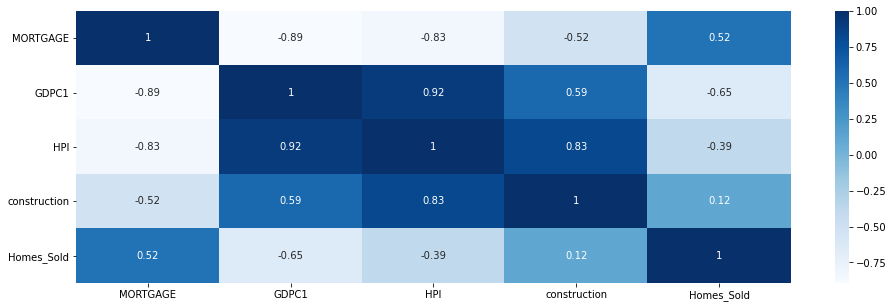

In [12]:
# Correlation heatmap of the data 
sns.heatmap(sdref.corr(), cmap='Blues', annot=True)

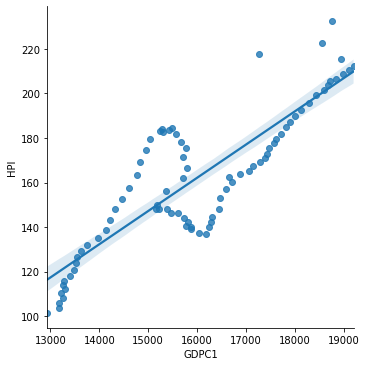

In [13]:
# Regression plot in seaborn including the period of the great reession 

sns.lmplot(x='GDPC1', y='HPI',
            data=sd, order=1)

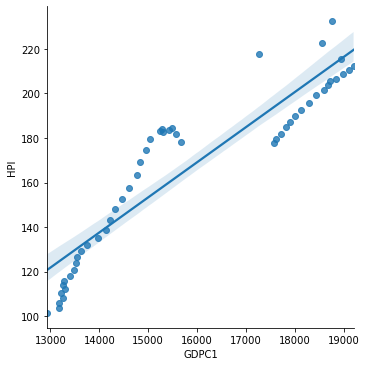

In [14]:
# Regression plot in seaborn NOT including the period of the great reession 

sns.lmplot(x='GDPC1', y='HPI',
            data=sdref)

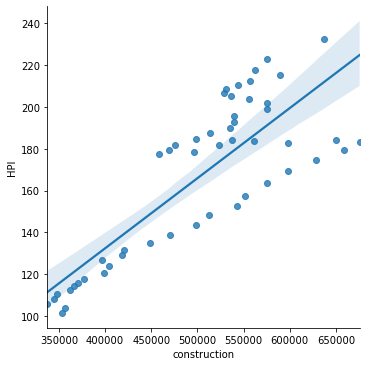

In [15]:
sns.lmplot(x='construction', y='HPI',
            data=sdref)

# Perform Multiple Linear Regression in Stats models 

In [16]:
# Perform Multiple Linear Regression in Statsmodels 

model_1 = 'HPI~GDPC1 + MORTGAGE + construction + Homes_Sold '

result = smf.ols(formula=model_1,data=sdref).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     356.8
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           5.50e-34
Time:                        05:39:51   Log-Likelihood:                -168.45
No. Observations:                  51   AIC:                             346.9
Df Residuals:                      46   BIC:                             356.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -41.0474     34.432     -1.192   

In [17]:
# Perform Multiple Linear Regression in Statsmodels 

model_2 = 'HPI ~ GDPC1 + construction'

result2 = smf.ols(formula=model_2,data=sdref).fit()

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     693.4
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           3.86e-36
Time:                        05:39:51   Log-Likelihood:                -170.20
No. Observations:                  51   AIC:                             346.4
Df Residuals:                      48   BIC:                             352.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -101.9323      7.379    -13.814   

In [18]:
sdref['HPI_pred'] = result2.fittedvalues
sdref.head(2)

,DATE,MORTGAGE,GDPC1,HPI,construction,Homes_Sold,HPI_pred
0,2000-01-01,8.26,12935.252,101.34,353065,873,107.328508
1,2000-04-01,8.32,13170.749,103.67,356188,841,110.553845


In [19]:
# Prediction of what HPI will be with GDP and construction at certain levels 

# result.predict 

# result.get_prediction().summary_frame(alpha=0.05)

# result.ssr ( rss, or residual sum of squares)

# RSE ( residual standard Error ) = np.sqrt(RSS/n-2)= Tells us how many HPI points our model is off by 

# ( also can use np.sqrt(result2.scale) to get the RSE) 

# Perform Multiple Linear Regression in Scikit-learn

In [20]:
X_features = sdref[['construction','GDPC1']]

X_features.head()

y_target = sdref['HPI']



In [21]:
 lr = linear_model.LinearRegression() #instantiate the model
    

lr.fit(X_features,y_target)


LinearRegression()

In [22]:
lr.coef_       # slope parameters 

array([0.00017684, 0.01135073])

In [23]:
lr.intercept_  #b0

-101.93229658444545

In [24]:
lr.predict(X_features)
y_pred = lr.predict(X_features) 

# Model Evaluation 

In [25]:
# RMSE 

np.sqrt(metrics.mean_squared_error(y_target,y_pred))

6.810078633565964

In [26]:
# MAE ( Mean absolute error )

# metrics.mean_absolute_error(y_target,y_pred) 

# metrics.mean_squared_error(y_target,y_pred)


In [27]:
# R-squared
metrics.r2_score(y_target,y_pred)

0.9665461216676912

In [28]:
# test_train_split method 

X_train, X_test, y_train, y_test = train_test_split(X_features,y_target
                                                    , test_size=.2)

X_test

,construction,GDPC1
83,637138,18767.778
8,377631,13394.910
3,344095,13262.250
23,658590,15041.232
71,539543,18296.685
14,448917,13970.157
76,528328,18833.195
22,628750,14956.291
82,575451,18560.774
66,475371,17724.489


In [29]:
# Model done using training set 

mlr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_predd = lr.predict(X_test)

metrics.r2_score(y_test,y_predd)



0.9761840347038051

# Cross-Validation 

In [30]:
# cross val score 

-cross_val_score(lr,X_features,y_target, cv=10, scoring='neg_mean_squared_error').mean()

73.35564308284496

# Perform Time-series Analysis 

In [31]:
# Switch back to sd dataset  which includes period of the great recession

sdi = sd.reset_index()

sdi.head(2)

sdi['date'] = pd.to_datetime(sdi['DATE'], format='%Y-%m-%d', errors='coerce')
sdi.head(3)

,index,DATE,MORTGAGE,GDPC1,HPI,construction,Homes_Sold,date
0,0,2000-01-01,8.26,12935.252,101.34,353065,873,2000-01-01
1,1,2000-04-01,8.32,13170.749,103.67,356188,841,2000-04-01
2,2,2000-07-01,8.02,13183.890,105.79,337374,887,2000-07-01


In [32]:
sdi.head(3)

,index,DATE,MORTGAGE,GDPC1,HPI,construction,Homes_Sold,date
0,0,2000-01-01,8.26,12935.252,101.34,353065,873,2000-01-01
1,1,2000-04-01,8.32,13170.749,103.67,356188,841,2000-04-01
2,2,2000-07-01,8.02,13183.890,105.79,337374,887,2000-07-01


In [33]:
sdi.set_index('date', inplace=True)

sdi.head()

,index,DATE,MORTGAGE,GDPC1,HPI,construction,Homes_Sold
date,,,,,,,
2000-01-01,0,2000-01-01,8.26,12935.252,101.34,353065,873
2000-04-01,1,2000-04-01,8.32,13170.749,103.67,356188,841
2000-07-01,2,2000-07-01,8.02,13183.890,105.79,337374,887
2000-10-01,3,2000-10-01,7.62,13262.250,108.27,344095,933
2001-01-01,4,2001-01-01,7.01,13219.251,110.48,348279,936


In [34]:
HPI_quarterly = sdi.resample('Q').mean()['HPI']

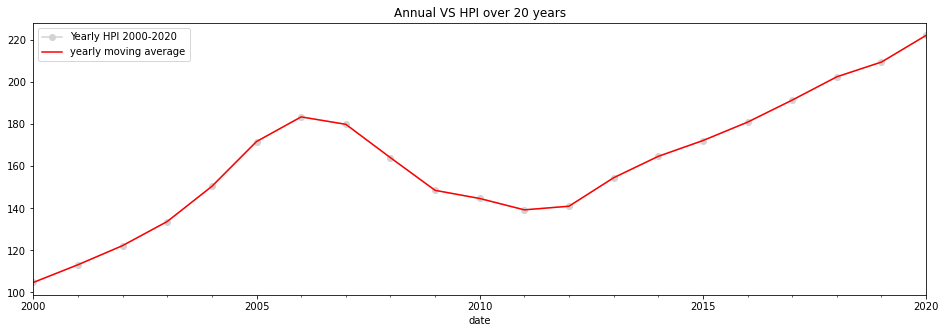

In [35]:
# Resampling and plotting the data 


HPI_yearly = sdi.resample('Y').mean()['HPI']


HPI_yearly.plot(marker='o', color='lightgray', label='Yearly HPI 2000-2020', title='Annual HPI over 20 years')

plt.legend()

HPI_yearly.rolling(1).mean().plot(color='red', label='yearly moving average',title='Annual VS HPI over 20 years')

plt.legend()
plt.show()

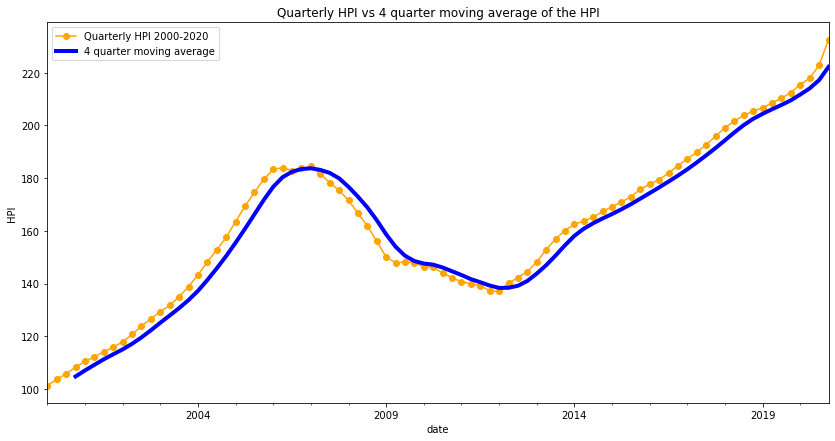

In [36]:
HPI_quarterly = sdi.resample('Q').mean()['HPI']


sdi['HPI'].plot(marker='o', color='orange', label='Quarterly HPI 2000-2020')

plt.legend()

HPI_quarterly.rolling(4).mean().plot(color='blue', label='4 quarter moving average', linewidth=4,
                                     
title=('Quarterly HPI vs 4 quarter moving average of the HPI'), figsize=(14,7))
plt.ylabel('HPI')
plt.legend()
plt.show()


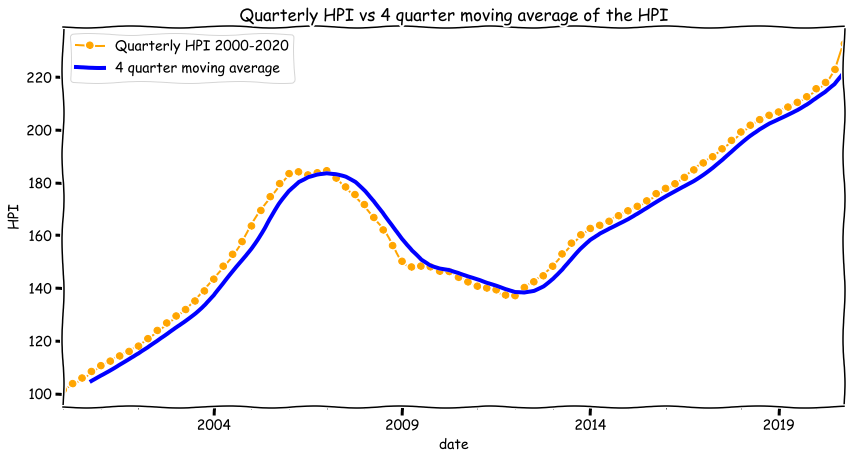

In [37]:
with plt.xkcd():
    HPI_quarterly = sdi.resample('Q').mean()['HPI']


    sdi['HPI'].plot(marker='o', color='orange', label='Quarterly HPI 2000-2020')

    plt.legend()

    HPI_quarterly.rolling(4).mean().plot(color='blue', label='4 quarter moving average', linewidth=4,
                                     
    title=('Quarterly HPI vs 4 quarter moving average of the HPI'), figsize=(14,7))
    plt.ylabel('HPI')
    plt.legend()
    plt.show()
    

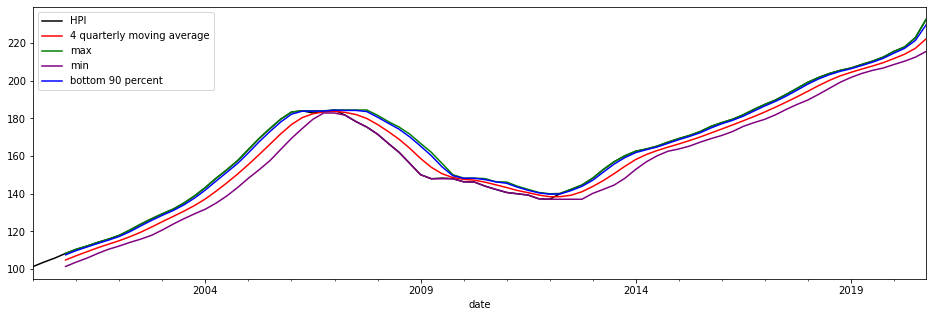

In [38]:
# various statistics mapped across time of the HPI 

sdi['HPI'].plot(color='black')

sdi['HPI'].rolling(window=4, center=False).mean().plot(color='red', label='4 quarterly moving average')

sdi['HPI'].rolling(window=4, center=False).max().plot(color='green', label='max')

sdi['HPI'].rolling(window=4, center=False).min().plot(color='purple', label='min')

sdi['HPI'].rolling(window=4, center=False).quantile(0.9).plot(color='blue', label='bottom 90 percent')

plt.legend()


plt.show()


# Time-Series Forecasting 

<ipython-input-39-129adc727611>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(sdi['HPI'], freq=4)


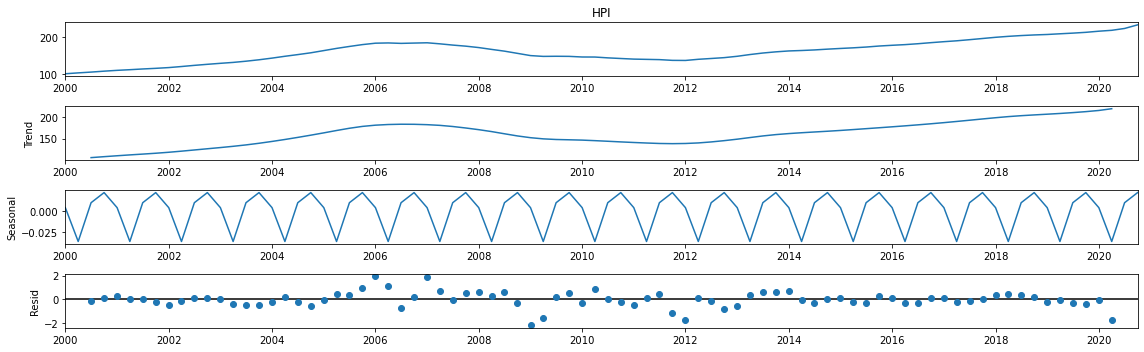

In [39]:
# Look for any trends, or seasonal trends and shifts in the data

decomposition = seasonal_decompose(sdi['HPI'], freq=4)
decomposition.plot()
plt.show()

In [40]:
# check to see if data is stationary using Dickey-Fuller test 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(sdi['HPI'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  0.287725
p-value                         0.976774
#Lags Used                      4.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64


In [41]:
import pmdarima as pm
modelar = pm.auto_arima(sdi['HPI'], d=1, D=1,
                      m=4, trend='c', seasonal=True, 
                      start_p=0, start_q=0, max_order=6, test='adf',
                      stepwise=True, trace=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=369.290, Time=0.30 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=366.881, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=291.031, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=292.616, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=287.549, Time=0.22 sec
 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=0.82 sec
 ARIMA(1,1,0)(1,1,1)[4]             : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(2,1,0)[4]             : AIC=367.603, Time=0.09 sec
 ARIMA(2,1,0)(2,1,0)[4]             : AIC=282.885, Time=0.24 sec
 ARIMA(2,1,0)(1,1,0)[4]             : AIC=284.070, Time=0.16 sec
 ARIMA(2,1,0)(2,1,1)[4]             : AIC=inf, Time=1.69 sec
 ARIMA(2,1,0)(1,1,1)[4]             : AIC=inf, Time=1.33 sec
 ARIMA(3,1,0)(2,1,0)[4]             : AIC=282.881, Time=0.31 sec
 ARIMA(3,1,0)(1,1,0)[4]             : AIC=284.374, Time=0.28 sec
 A

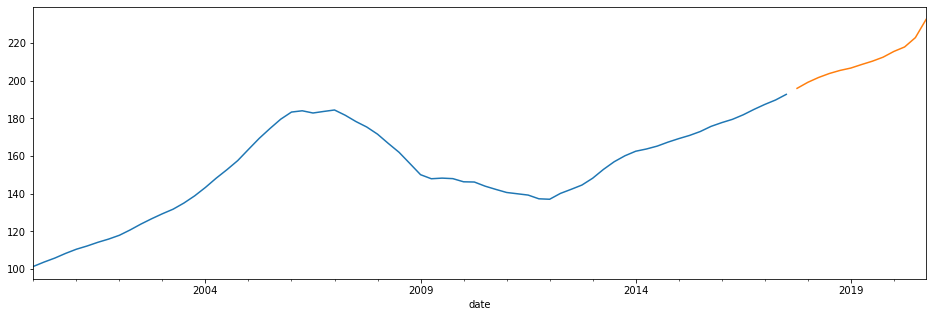

In [42]:
#divide into train and validation set
train = sdi[:int(0.85*(len(sdi)))]
test = sdi[int(0.85*(len(sdi))):]

train['HPI'].plot()
test['HPI'].plot()
plt.show()

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelx = SARIMAX(train['HPI'],
                order=(2,1,1),seasonal=(2,1,0))
resultx = modelx.fit()
resultx.summary()

C:\Users\Khali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\Khali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\Khali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Khali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    HPI   No. Observations:                   71
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -106.704
Date:                Tue, 21 Dec 2021   AIC                            221.407
Time:                        05:40:15   BIC                            230.401
Sample:                    01-01-2000   HQIC                           224.980
                         - 07-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6318      0.232      2.722      0.006       0.177       1.087
ar.L2          0.2309      0.228      1.010      0.312      -0.217       0.679
ma.L1          0.6173      0.206      2.999      0.003       0.214       1.021
sigma2         1.1958      0.194      6.175      0.000       0.816       1.575
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 4.37
Prob(Q):                              0.75   Prob(JB):                         0.11
Heteroskedasticity (H):               2.53   Skew:                            -0.33
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
resultx.get_forecast(steps=24)

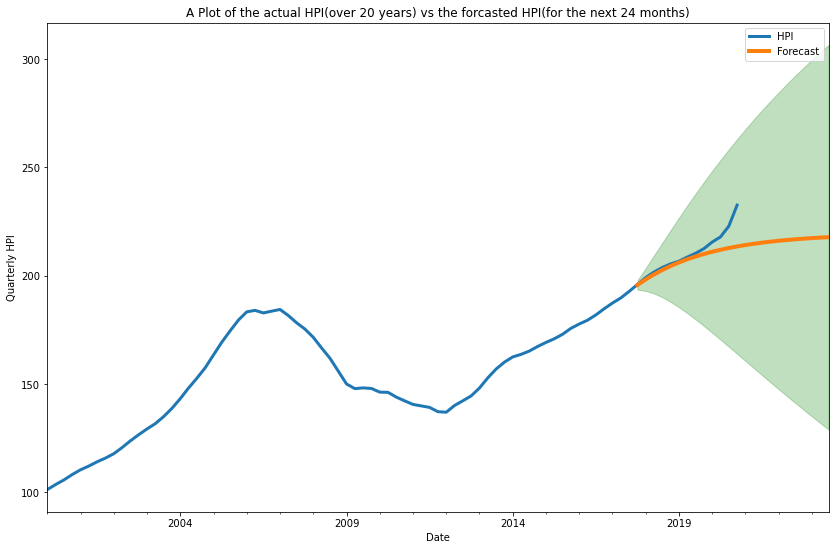

In [45]:
pred_hpi = resultx.get_forecast(steps=24)
pred_ci = pred_hpi.conf_int()
ax = sdi['HPI'].plot(label='HPI', figsize=(14, 9), linewidth=3)
pred_hpi.predicted_mean.plot(ax=ax, label='Forecast',
title=('A Plot of the actual HPI(over 20 years) vs the forcasted HPI(for the next 24 months)'), linewidth=4)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='g', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Quarterly HPI')
plt.legend()
plt.show()


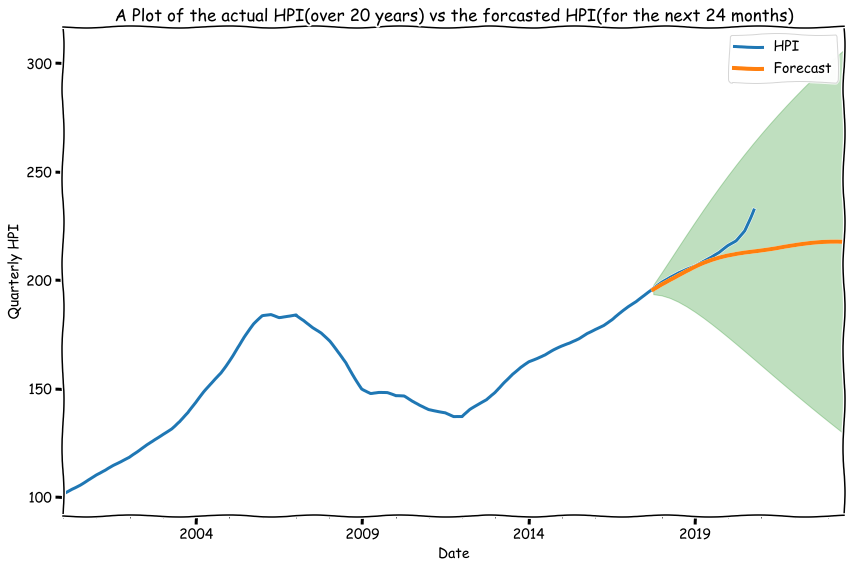

In [46]:
with plt.xkcd():
    pred_hpi = resultx.get_forecast(steps=24)
    pred_ci = pred_hpi.conf_int()
    ax = sdi['HPI'].plot(label='HPI', figsize=(14, 9), linewidth=3)
    pred_hpi.predicted_mean.plot(ax=ax, label='Forecast',
    title=('A Plot of the actual HPI(over 20 years) vs the forcasted HPI(for the next 24 months)'), linewidth=4)

    ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='g', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Quarterly HPI')
    plt.legend()
    plt.show()

    

# Model Validation

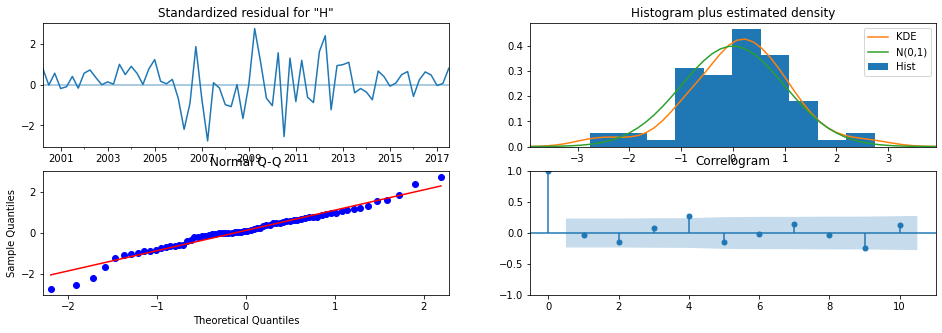

In [47]:
# plot of diagnostic information about the error and variance 

diagnostic_info = resultx.plot_diagnostics()

plt.show()

In [48]:
start=len(train)
end=len(train)+len(test)-1
prediction = resultx.predict(start=start, end=end, dynamic=False, typ='levels')

In [49]:
# Mean absolute percent error 

mape = np.mean(np.abs(prediction - test['HPI'])/np.abs(test['HPI']))*100
mape

1.7120760346239499